In [1]:
import zstandard as zstd
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
def compress_csv_file(input_file, compressed_file):
    df = pd.read_csv(input_file)
    data = df.to_csv(index=False).encode('utf-8')

    compressor = zstd.ZstdCompressor(level=5)

    start_time = time.time()
    compressed_data = compressor.compress(data)
    compression_time = time.time() - start_time

    with open(compressed_file, 'wb') as f_out:
        f_out.write(compressed_data)

    return len(data), len(compressed_data), compression_time

In [4]:
def decompress_csv_file(compressed_file, output_file):
    with open(compressed_file, 'rb') as f_in:
        compressed_data = f_in.read()

    decompressor = zstd.ZstdDecompressor()

    start_time = time.time()
    decompressed_data = decompressor.decompress(compressed_data)
    decompression_time = time.time() - start_time

    decompressed_text = decompressed_data.decode('utf-8')
    with open(output_file, 'w', encoding='utf-8') as f_out:
        f_out.write(decompressed_text)

    return len(decompressed_data), decompression_time


--- RESULTS (Zstandard Compression) ---
Original File: human_vital_signs_dataset_2024.csv
Compressed File: compressed_dataset.zst
Decompressed File: decompressed_dataset.csv
Original File Size: 38485859 bytes
Compressed File Size: 14582805 bytes
Decompressed File Size: 38485859 bytes
Compression Ratio: 2.64
Compression Time: 1.0725 seconds
Decompression Time: 0.1827 seconds


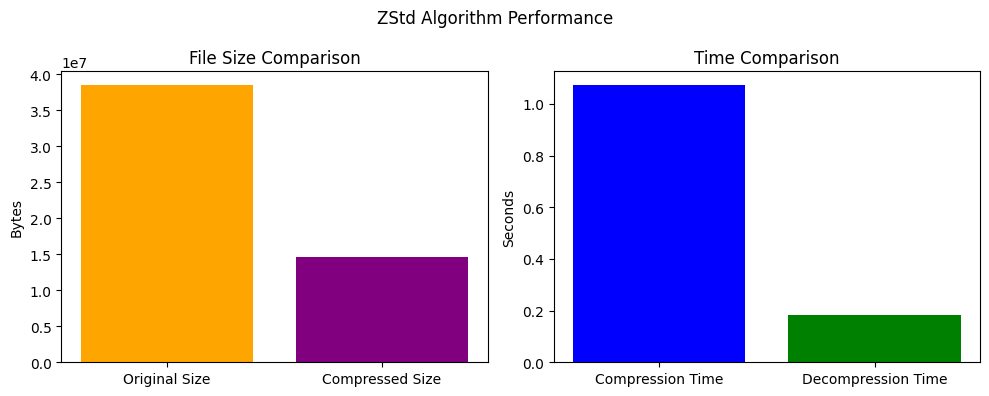

In [5]:
if __name__ == "__main__":
    input_file = "human_vital_signs_dataset_2024.csv"
    compressed_file = "compressed_dataset.zst"
    decompressed_file = "decompressed_dataset.csv"

    # --- Compression ---
    original_size, compressed_size, compression_time = compress_csv_file(input_file, compressed_file)
    compression_ratio = original_size / compressed_size

    # --- Decompression ---
    decompressed_size, decompression_time = decompress_csv_file(compressed_file, decompressed_file)

    print("\n--- RESULTS (Zstandard Compression) ---")
    print(f"Original File: {input_file}")
    print(f"Compressed File: {compressed_file}")
    print(f"Decompressed File: {decompressed_file}")
    print(f"Original File Size: {original_size} bytes")
    print(f"Compressed File Size: {compressed_size} bytes")
    print(f"Decompressed File Size: {decompressed_size} bytes")
    print(f"Compression Ratio: {compression_ratio:.2f}")
    print(f"Compression Time: {compression_time:.4f} seconds")
    print(f"Decompression Time: {decompression_time:.4f} seconds")

    # --- Visualization ---
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    labels = ['Original Size', 'Compressed Size']
    sizes = [original_size, compressed_size]
    plt.bar(labels, sizes, color=['orange', 'purple'])
    plt.title('File Size Comparison')
    plt.ylabel('Bytes')

    # --- Visualization: Time Comparison ---
    plt.subplot(1, 2, 2)
    time_labels = ['Compression Time', 'Decompression Time']
    times = [compression_time, decompression_time]
    plt.bar(time_labels, times, color=['blue', 'green'])
    plt.title('Time Comparison')
    plt.ylabel('Seconds')

    plt.suptitle('ZStd Algorithm Performance')
    plt.tight_layout()
    plt.show()